In [121]:
import numpy as np
import pandas as pd 
import seaborn as sn
from scipy.stats import spearmanr
import matplotlib.pyplot as plt


## Part 1: understanding the data

In [79]:
# reading the data set
df = pd.read_csv("data/tips-new.csv")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [80]:
# Get some usefull information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In the previous cell, we have:

-column names.

-number of entries: 244.

-number of non-values: 0, since the number of entries is eaul to non values in every column.

-Data types: 3 numerical columns (1 integer and 2 floats), 4 object (string) columns.

In [82]:
#let's see a distribution for the numerical columns
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [85]:
# let's see the distribution of the non-numerical columns.
df.describe(include='object')

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


 Now we have some important information:

##### Numerical columns:

We know the mean values of all the numerical columns, as the minimum value, maximum value, standar devation and the percentiles. We now know that the bigest tip was 10 dlls, the biggest bill was 50.81 dlls and thate the maximum size of a party was 6 persons.

##### Object columns:

For the object columns we now know that the 'sex', 'smoker' and 'time' columns are binary, as they only have two possible values. The 'day' column has 4 possible values taht we'll find them next. 

We also know that 157 bills were paid by men, that 151 were non smokers, 87 bills were paid on saturday and 176 were dinners

In [108]:
# We'll get the unique values of the object columns 
for i in ['sex','day','smoker','time']:
    print(i+': '+ ', '.join(df[i].unique()))

sex: Female, Male
day: Sun, Sat, Thur, Fri
smoker: No, Yes
time: Dinner, Lunch


## Part 2: looking for the values distribution

Here we want to see a graphic distribution of the payed bills, grouped by 'sex', 'day', 'smoker' and 'time'

<AxesSubplot:xlabel='sex'>

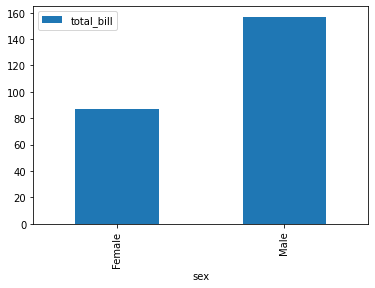

In [114]:
df[['sex','total_bill']].groupby('sex').count().plot(kind='bar')

<AxesSubplot:xlabel='day'>

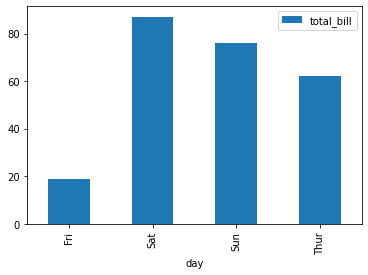

In [115]:
df[['day','total_bill']].groupby('day').count().plot(kind='bar')

<AxesSubplot:xlabel='smoker'>

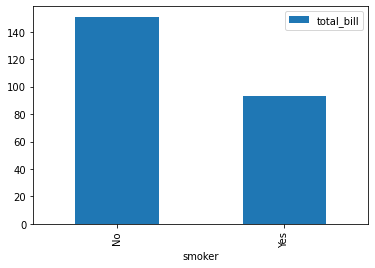

In [117]:
df[['smoker','total_bill']].groupby('smoker').count().plot(kind='bar')

<AxesSubplot:xlabel='time'>

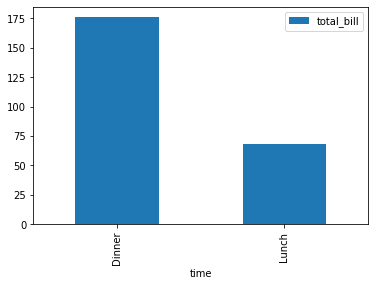

In [118]:
df[['time','total_bill']].groupby('time').count().plot(kind='bar')

So, there are clearly more men paying for the total bill.

The day that has more billls payed is Saturday followed by sunday and thursday. Being Friday the day with the least payed bills.

There are more non smoker customers.

And dinner is the time when there are the most payed bills


## Part 3: looking for correlation betwen variables.

array([[<AxesSubplot:xlabel='total_bill', ylabel='total_bill'>,
        <AxesSubplot:xlabel='tip', ylabel='total_bill'>,
        <AxesSubplot:xlabel='size', ylabel='total_bill'>],
       [<AxesSubplot:xlabel='total_bill', ylabel='tip'>,
        <AxesSubplot:xlabel='tip', ylabel='tip'>,
        <AxesSubplot:xlabel='size', ylabel='tip'>],
       [<AxesSubplot:xlabel='total_bill', ylabel='size'>,
        <AxesSubplot:xlabel='tip', ylabel='size'>,
        <AxesSubplot:xlabel='size', ylabel='size'>]], dtype=object)

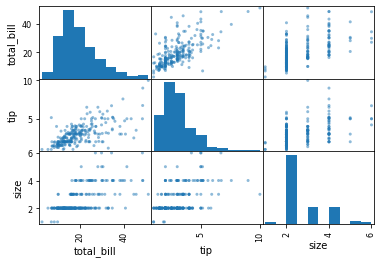

In [77]:
pd.plotting.scatter_matrix(df)

From this scatter matrix we can conclude that the only variable 'related' to the amount of the tip is the total bill. But we need to review the correlation coefficients. 

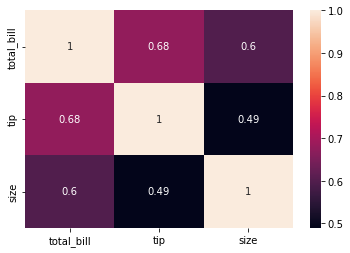

In [15]:
sn.heatmap(df.corr(), annot=True)
plt.show()

As we can see the correlation between the total bills and the tips is stronger compare to the relation between the size of the table and the amount of the tips that the waiters received. 

Lets check if this correlation is maintained if we divide the customers in female and male.

<AxesSubplot:ylabel='sex-None'>

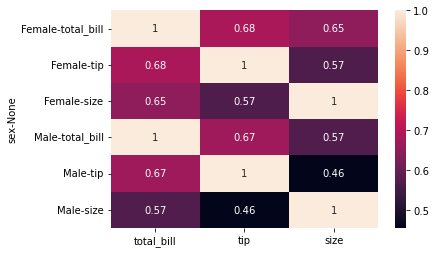

In [18]:
sn.heatmap(df.groupby('sex').corr(), annot=True)

To specify the previous matrix we can illustrate the results based on different genders. Hence, we can conclude that regarding the same size of the table women paid more tips compare to men.

In [124]:
spearmanr(df['tip'],df['total_bill'])

SpearmanrResult(correlation=0.6789681219001009, pvalue=2.501158440923584e-34)

So, we have a correlation spearman coefficient of 0.67 that is significant because the p value is < 0.05

From here we can say taht the correlation between the total bill and the tip amount correlated.


Now let's create a new column called 'tip_rate' that will be the rate between the total bill and the tip. 

In [126]:
df['tip_rate'] = df['tip']/df['total_bill']
df['tip_rate'].describe()

count    244.000000
mean       0.160803
std        0.061072
min        0.035638
25%        0.129127
50%        0.154770
75%        0.191475
max        0.710345
Name: tip_rate, dtype: float64

From here we can say that the maximum rate was 0.71 from the total bill. And the minimum was 0.035.

<AxesSubplot:xlabel='total_bill'>

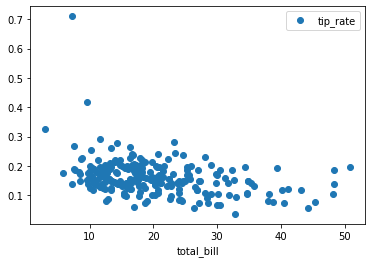

In [129]:
df.plot(x = 'total_bill', y = 'tip_rate', style = 'o')

From this graph we can't see a correlation between the total bill and the tip rate. Which is as spected as the percentage of the tip most of the times is between 10% and 20% in USA (also in Mexico)


## Part4: impact of all variables on the tip_rate